## 《合成孔径雷达成像——算法与实现》中5.6 点目标示例  零斜视角情况

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体 
plt.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题 

In [2]:
from numpy import sinc,cos,arctan,angle,pi,abs,ceil,sqrt,exp
from numpy.fft import fft,fft2

## 参数设置
#  已知参数--》距离向参数
R_eta_c = 20e+3;                # 景中心斜距
Tr = 25e-6;                     # 发射脉冲时宽
Kr = 0.25e+12;                  # 距离向调频率
alpha_os_r = 1.2;               # 距离过采样率
Nrg = 256;                      # 距离线采样点数
#  计算参数--》距离向参数
Bw = abs(Kr)*Tr;                # 距离信号带宽
Fr = alpha_os_r*Bw;             # 距离向采样率
#  已知参数--》方位向参数
c = 3e+8;                       # 电磁传播速度
Vr = 150;                       # 等效雷达速度
Vs = Vr;                        # 卫星平台速度
Vg = Vr;                        # 波束扫描速度
f0 = 5.3e+9;                    # 雷达工作频率
Delta_f_dop = 80;               # 多普勒带宽
alpha_os_a = 1.3;               # 方位过采样率
Naz = 256;                      # 距离线数
theta_r_c = np.array([0,-22.8]);          # 波束斜视角
t_eta_c = np.array([0,-51.7]);            # 波束中心穿越时刻
f_eta_c = np.array([0,+2055]);            # 多普勒中心频率
#  计算参数--》方位向参数
lambda0 = c/f0;                  # 雷达工作波长
Fa = alpha_os_a*Delta_f_dop;    # 方位向采样率
#  参数计算
R0 = R_eta_c*cos(theta_r_c[0]);                         # 最短斜距
La = 0.886*2*Vs*cos(theta_r_c[0])/Delta_f_dop;          # 实际天线长度
theta_bw = 0.886*lambda0/La;                             # 方位向3dB波束宽度
Trr = Nrg/Fr;                   # 发射脉冲时宽
Taa = Naz/Fa;                   # 目标照射时间
Ka = 2*Vr**2/lambda0/R0;          # 方位向调频率
d_t_tau = 1/Fr;                 # 距离采样时间间隔
d_t_eta = 1/Fa;                 # 方位采样时间间隔
d_f_tau = Fa/Nrg;               # 距离采样频率间隔    
d_f_eta = Fa/Naz;               # 方位采样频率间隔
## 变量设置
#  时间变量                                                    
t_tau = np.arange(-Trr/2,Trr/2,d_t_tau) + 2*R_eta_c/c;   # 距离时间变量
t_eta = np.arange(-Taa/2,Taa/2,d_t_eta) + t_eta_c[0];    # 方位时间变量
#  坐标设置                                                                                                             
t_tauX,t_eta_Y= np.meshgrid(t_tau,t_eta);               # 设置二维网络坐标
## 信号设置
R_eta = R0 + Vr**2*t_eta_Y**2/(2*R0);                    # 瞬时斜率
A0 = 1;                                                 # 后向散射系数幅度
wr = np.where(abs(t_tauX-2*R_eta/c) <= Tr/2,1,0);                   # 距离向包络
wa = sinc(0.886*arctan(Vg*(t_eta_Y-t_eta_c[0])/R0)/theta_bw)**2;      # 方位向包络
#  接收信号
srt = A0*wr*wa*exp(-1j*4*pi*R0/lambda0)*exp(-1j*pi*Ka*t_eta_Y**2)*exp(+1j*pi*Kr*(t_tauX-2*R_eta/c)**2);                                                        
srt_z = A0*wr*wa*exp(-1j*4*pi*R0/lambda0)*exp(-1j*pi*Ka*t_eta_Y**2)*exp(+1j*pi*Kr*(t_tauX-2*R_eta/c)**2);# 正扫频
srt_f = A0*wr*wa*exp(-1j*4*pi*R0/lambda0)*exp(-1j*pi*Ka*t_eta_Y**2)*exp(-1j*pi*Kr*(t_tauX-2*R_eta/c)**2);# 负扫频
#  距离时域-方位频域
# from numpy import savetxt
# savetxt("srt.txt",np.abs(srt),delimiter=',')
Srf_rd = fft(srt,axis=0);

#  距离频域-方位频域
SrF_2d = fft2(srt);

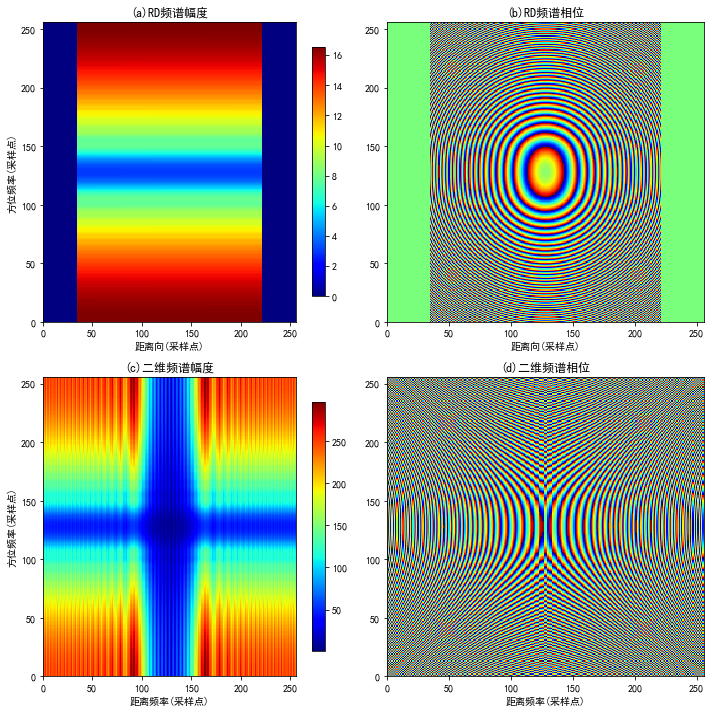

In [3]:
# 绘图
from matplotlib.pyplot import figure,subplot,plot,axis,title,xlabel,ylabel,text,arrow
eps = np.finfo(np.float64).eps
# 绘图      
figure(figsize=(10,10));

subplot(221)
plt.pcolor(abs(Srf_rd),cmap='jet')
plt.colorbar(shrink = .83)
xlabel('距离向(采样点)');ylabel('方位频率(采样点)');title('(a)RD频谱幅度');
subplot(222)
plt.pcolor(angle(Srf_rd+eps),cmap='jet')
xlabel('距离向(采样点)');title('(b)RD频谱相位');
#  距离频域-方位频域                  
subplot(223)
plt.pcolor(abs(SrF_2d),cmap='jet')
plt.colorbar(shrink = .83)
xlabel('距离频率(采样点)');ylabel('方位频率(采样点)');title('(c)二维频谱幅度');
subplot(224)
plt.pcolor(angle(SrF_2d+eps),cmap='jet')
xlabel('距离频率(采样点)');title('(d)二维频谱相位');

plt.tight_layout()

本文Python代码参照Matlab代码自：https://github.com/wanghs008/SAR-SignalProcessing